In [1]:
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt

In [2]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

/home/user/Documents/AI/MiDaS/env/lib/python3.12/site-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /home/user/.cache/torch/hub/master.zip
/home/user/Documents/AI/MiDaS/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from

In [3]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /home/user/.cache/torch/hub/intel-isl_MiDaS_master
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /home/user/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████| 1.28G/1.28G [03:12<00:00, 7.15MB/s]


In [4]:
if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [6]:
img = cv2.imread("Testimages/Img1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [7]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

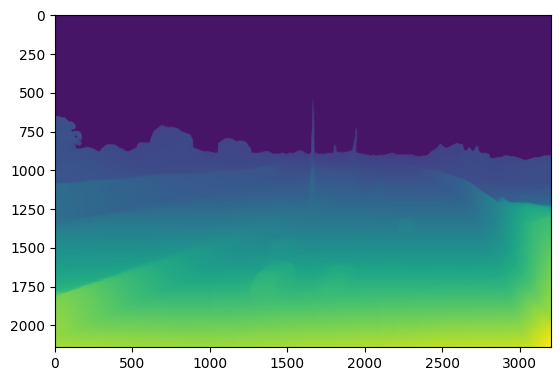

In [8]:
plt.imshow(output)
plt.show()

In [13]:
output.shape
cv2.imshow("Output", output)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2142, 3200)

In [18]:
import glob

folder_path = "Testimages/ETS/"
image_paths = glob.glob(folder_path + "*.jpeg")

print(image_paths)



['Testimages/ETS/2-9.jpeg', 'Testimages/ETS/1-131.jpeg', 'Testimages/ETS/2-102.jpeg', 'Testimages/ETS/2-13.jpeg', 'Testimages/ETS/2-101.jpeg', 'Testimages/ETS/3-23.jpeg', 'Testimages/ETS/5-168.jpeg', 'Testimages/ETS/4-63.jpeg', 'Testimages/ETS/1-127.jpeg', 'Testimages/ETS/5-139.jpeg', 'Testimages/ETS/3-46.jpeg', 'Testimages/ETS/2-159.jpeg', 'Testimages/ETS/2-110.jpeg', 'Testimages/ETS/6-159.jpeg', 'Testimages/ETS/5-94.jpeg', 'Testimages/ETS/4-20.jpeg', 'Testimages/ETS/2-108.jpeg', 'Testimages/ETS/5-70.jpeg', 'Testimages/ETS/3-166.jpeg', 'Testimages/ETS/5-113.jpeg', 'Testimages/ETS/4-82.jpeg', 'Testimages/ETS/6-41.jpeg', 'Testimages/ETS/1-62.jpeg', 'Testimages/ETS/6-63.jpeg', 'Testimages/ETS/6-157.jpeg', 'Testimages/ETS/4-62.jpeg', 'Testimages/ETS/1-28.jpeg', 'Testimages/ETS/4-35.jpeg', 'Testimages/ETS/4-13.jpeg', 'Testimages/ETS/5-198.jpeg', 'Testimages/ETS/2-56.jpeg', 'Testimages/ETS/5-89.jpeg', 'Testimages/ETS/2-2.jpeg', 'Testimages/ETS/3-172.jpeg', 'Testimages/ETS/4-85.jpeg', 'Testi

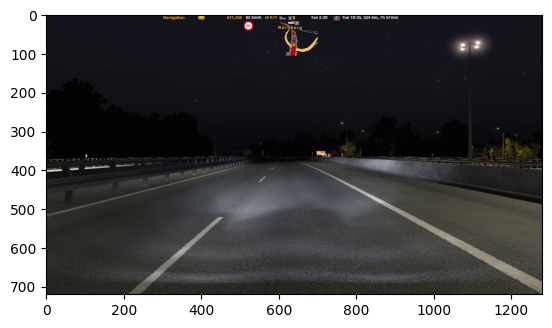

In [19]:
img = cv2.imread(image_paths[0])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))